In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report

In [3]:
df = pd.read_excel('Preprocessed.xlsx')

In [4]:
df.head()

T  MO  CT  NI  PB  ET  HF  TA  BS  Degree of Injury
0  1   8   0   1  10   2  14   1   0                 0
1  1   7   8   9  10   2  10   1   1                 0
2  1   6   0   5  12  14   4   2   0                 0
3  0   6   3  21  13   5  14   1   1                 1
4  0   6   0   3  20   1  15   1   0                 0

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Degree of Injury', axis=1)
y = df['Degree of Injury']


In [7]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (4847, 9)
Shape of X after SMOTE: (5928, 9)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Degree of Injury, dtype: float64

Accuracy = 0.87
Recall = 0.88



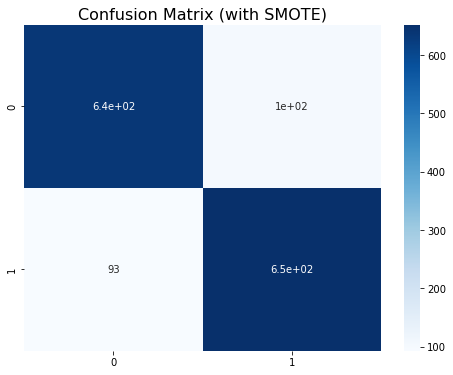

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = DecisionTreeClassifier(max_features = 7, max_depth= 10,min_samples_leaf=23)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

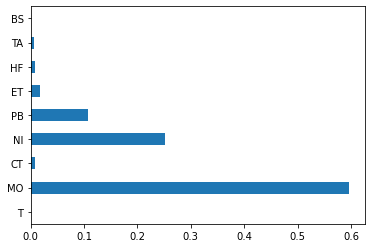

In [11]:
attr = model.feature_importances_
feat_importances = pd.Series(attr, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()


In [13]:
plt.figure(figsize=(150,500))
tree.plot_tree(model,filled= True)

[Text(0.6118421052631579, 0.9545454545454546, 'X[1] <= 4.5\ngini = 0.5\nsamples = 4446\nvalue = [2227, 2219]'),
 Text(0.39623205741626794, 0.8636363636363636, 'X[3] <= 20.5\ngini = 0.377\nsamples = 2793\nvalue = [2088, 705]'),
 Text(0.2159090909090909, 0.7727272727272727, 'X[4] <= 12.5\ngini = 0.25\nsamples = 2242\nvalue = [1914, 328]'),
 Text(0.11244019138755981, 0.6818181818181818, 'X[4] <= 5.5\ngini = 0.136\nsamples = 1323\nvalue = [1226, 97]'),
 Text(0.0430622009569378, 0.5909090909090909, 'X[4] <= 3.5\ngini = 0.41\nsamples = 302\nvalue = [215, 87]'),
 Text(0.019138755980861243, 0.5, 'X[3] <= 3.5\ngini = 0.135\nsamples = 151\nvalue = [140, 11]'),
 Text(0.009569377990430622, 0.4090909090909091, 'gini = 0.328\nsamples = 29\nvalue = [23, 6]'),
 Text(0.028708133971291867, 0.4090909090909091, 'X[7] <= 1.5\ngini = 0.079\nsamples = 122\nvalue = [117, 5]'),
 Text(0.019138755980861243, 0.3181818181818182, 'X[1] <= 2.5\ngini = 0.04\nsamples = 97\nvalue = [95, 2]'),
 Text(0.009569377990430622

Accuracy = 0.88
Recall = 0.87



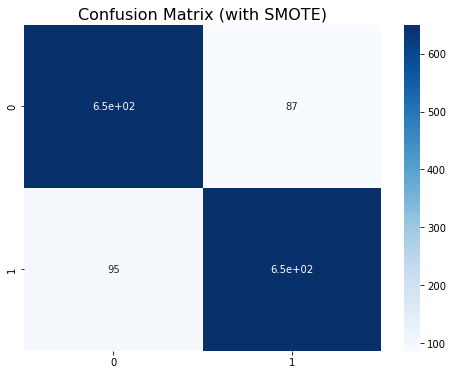

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = DecisionTreeClassifier(max_depth= 9, max_features= 6, min_samples_leaf= 10)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [62]:
from sklearn.model_selection import train_test_split

X = df.drop('Degree of Injury', axis=1)
y = df['Degree of Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 10)]
# Number of features to consider at every split
max_features = [3,4,5,6,7,8]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5,10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5,10,15,20,25]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
grid_search = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf =DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = GridSearchCV(estimator = clf, param_grid = grid_search, cv = 10, verbose=2, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 3, 4, 5, 5, 6, 7, 7, 8, 9, 10, None],
                         'max_features': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 15, 20, 25]},
             verbose=2)

In [64]:
clf_random.best_params_

{'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 10}

Accuracy = 0.88
Recall = 0.87



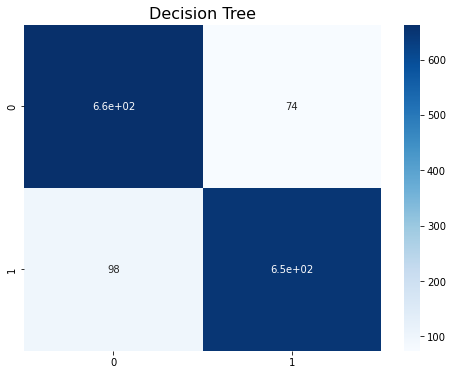

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = DecisionTreeClassifier(max_depth= 8,max_features = 8, min_samples_leaf=10)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Decision Tree', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

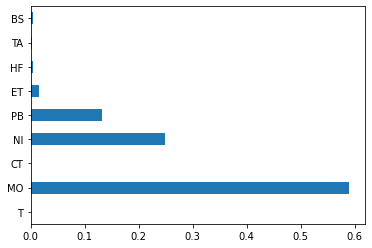

In [24]:
attr = model.feature_importances_
feat_importances = pd.Series(attr, index=X_train.columns)
feat_importances.plot(kind='barh')
plt.show()

In [74]:
attr.argsort()

array([2, 0, 6, 7, 8, 5, 3, 4, 1], dtype=int64)

[Text(0.6352293165467626, 0.9444444444444444, 'X[1] <= 4.5\ngini = 0.5\nsamples = 4446\nvalue = [2227, 2219]'),
 Text(0.43345323741007197, 0.8333333333333334, 'X[3] <= 20.5\ngini = 0.377\nsamples = 2793\nvalue = [2088, 705]'),
 Text(0.23381294964028776, 0.7222222222222222, 'X[4] <= 12.5\ngini = 0.25\nsamples = 2242\nvalue = [1914, 328]'),
 Text(0.12320143884892086, 0.6111111111111112, 'X[4] <= 5.5\ngini = 0.136\nsamples = 1323\nvalue = [1226, 97]'),
 Text(0.06294964028776978, 0.5, 'X[4] <= 3.5\ngini = 0.41\nsamples = 302\nvalue = [215, 87]'),
 Text(0.02877697841726619, 0.3888888888888889, 'X[3] <= 3.5\ngini = 0.135\nsamples = 151\nvalue = [140, 11]'),
 Text(0.014388489208633094, 0.2777777777777778, 'X[6] <= 9.5\ngini = 0.328\nsamples = 29\nvalue = [23, 6]'),
 Text(0.007194244604316547, 0.16666666666666666, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(0.02158273381294964, 0.16666666666666666, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.04316546762589928, 0.27777777777

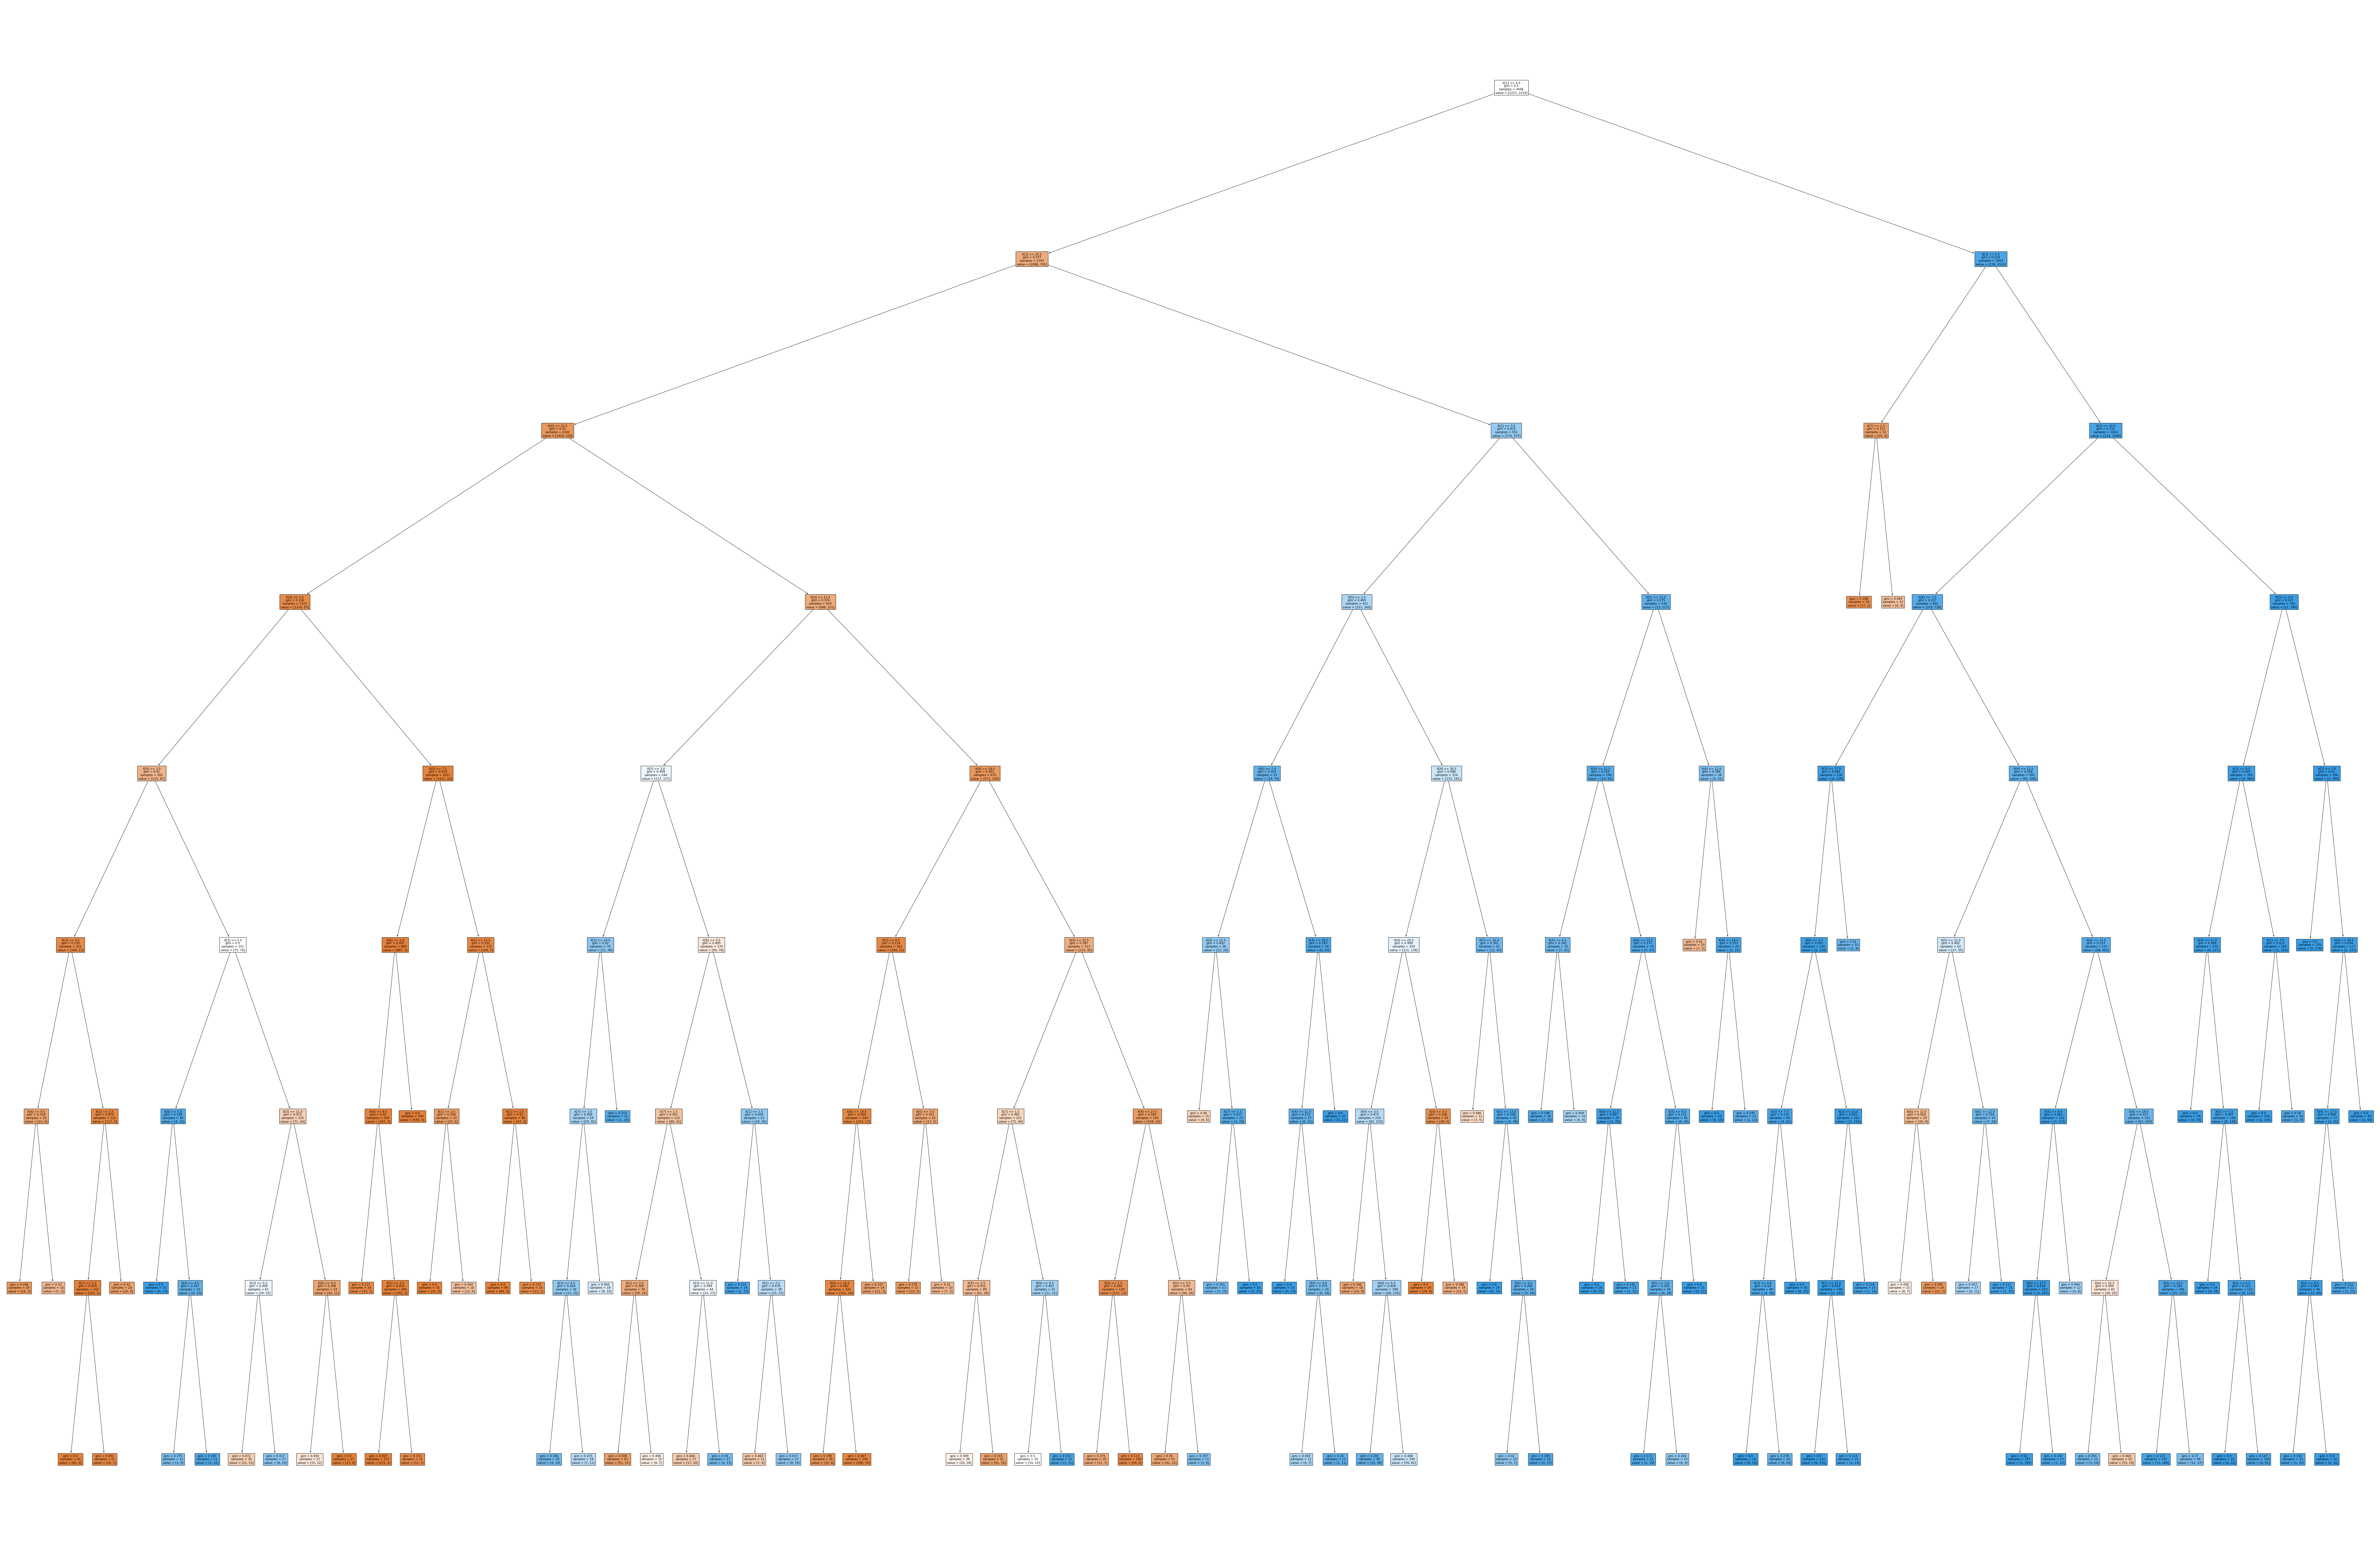

In [85]:
plt.figure(figsize=(150,100))
tree.plot_tree(model,filled= True)